In [1]:
import evopipe
import warnings

from sklearn.model_selection import train_test_split
from sklearn import datasets

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer
from sklearn.decomposition import PCA, KernelPCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import matplotlib.pyplot as plt
import seaborn as sns

preproc_l = [MinMaxScaler(), StandardScaler(), Normalizer(), Binarizer(), PCA(), KernelPCA(), NMF(), SelectKBest(chi2)]
classif_l = [SVC(), LinearSVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(),
             AdaBoostClassifier(), QuadraticDiscriminantAnalysis()]

In [2]:
digits = datasets.load_digits()
train_X, test_X, train_Y, test_Y = train_test_split(digits.data, digits.target, test_size = 0.25, random_state = 0)

In [3]:
print("Format:")
print("------------")
print("Classifier")
print("score")
print("cross-validation score")
print("------------")
print()

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for classif in classif_l:
        print(classif.__class__.__name__)
        classif.fit(train_X, train_Y)
        print(classif.score(test_X, test_Y))
        print(cross_val_score(classif, test_X, test_Y).mean())
        print()

Format:
------------
Classifier
score
cross-validation score
------------

SVC
0.4866666666666667
0.15292961629096083

LinearSVC
0.9288888888888889
0.9221555288782181

KNeighborsClassifier
0.98
0.9621661998132586

DecisionTreeClassifier
0.8533333333333334
0.773846427459873

RandomForestClassifier
0.9244444444444444
0.8576532835356364

AdaBoostClassifier
0.26222222222222225
0.3412502778889334

QuadraticDiscriminantAnalysis
0.9
0.20899648748388241



In [4]:
clf = evopipe.EvoPipeClassifier(preproc_l, classif_l, 2, pop_size=50, ngen=30)
clf.fit(train_X, train_Y)

score = clf.score(test_X, test_Y)
print("\nBest pipeline test score: {}\n".format(score))

best_pipes = clf.best_pipelines()

for pipe in best_pipes:
    pipe.fit(train_X, train_Y)
    score = pipe.score(test_X, test_Y)
    
    pipe_named_steps = []
    for key, val in pipe.steps:
        pipe_named_steps.append(key)       
    print("Score: {}, Pipe: {}".format(score, pipe_named_steps))


Gen 1:

Hall of fame:
['minmaxscaler', 'kernelpca', 'kneighborsclassifier']
['normalizer', 'pca', 'kneighborsclassifier']
['normalizer', 'kernelpca', 'kneighborsclassifier']
['normalizer', 'standardscaler', 'svc']
['standardscaler-1', 'standardscaler-2', 'kneighborsclassifier']

Gen 6:

Hall of fame:
['minmaxscaler', 'pca', 'kneighborsclassifier']
['minmaxscaler', 'kernelpca', 'kneighborsclassifier']
['pca', 'kernelpca', 'kneighborsclassifier']
['kernelpca', 'kneighborsclassifier']
['normalizer', 'minmaxscaler', 'kneighborsclassifier']

Gen 11:

Hall of fame:
['minmaxscaler', 'kneighborsclassifier']
['minmaxscaler', 'pca', 'kneighborsclassifier']
['minmaxscaler', 'kernelpca', 'kneighborsclassifier']
['pca', 'kernelpca', 'kneighborsclassifier']
['kernelpca', 'kneighborsclassifier']

Gen 16:

Hall of fame:
['minmaxscaler-1', 'minmaxscaler-2', 'kneighborsclassifier']
['minmaxscaler', 'kneighborsclassifier']
['minmaxscaler', 'pca', 'kneighborsclassifier']
['minmaxscaler', 'kernelpca', 'kn

gen	avg     	min     	max     
0  	0.847528	0.297787	0.980692
1  	0.92835 	0.757993	0.980692
2  	0.967375	0.861149	0.980692
3  	0.972581	0.711834	0.980692
4  	0.961641	0.221961	0.980692
5  	0.973653	0.807695	0.980692
6  	0.975555	0.820386	0.980692
7  	0.974324	0.8048  	0.980692
8  	0.978139	0.853765	0.980692
9  	0.953276	0.296078	0.980692
10 	0.980662	0.979193	0.980692
11 	0.980143	0.956212	0.980692
12 	0.978761	0.884129	0.980692
13 	0.980099	0.965117	0.980692
14 	0.977842	0.853765	0.980692
15 	0.978867	0.889435	0.980692
16 	0.980692	0.980692	0.980692
17 	0.980662	0.979188	0.980692
18 	0.978005	0.847088	0.980692
19 	0.97582 	0.835135	0.980692
20 	0.96485 	0.221961	0.980692
21 	0.972108	0.772792	0.980692
22 	0.976533	0.884129	0.980692
23 	0.965518	0.221961	0.980692
24 	0.96297 	0.308592	0.980692
25 	0.956174	0.102358	0.980692
26 	0.98041 	0.966591	0.980692
27 	0.980692	0.980692	0.980692
28 	0.978879	0.890781	0.980692
29 	0.978139	0.853007	0.980692


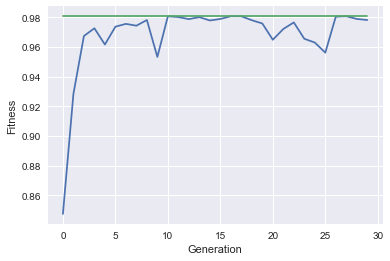

In [5]:
print(clf.logbook)

gen = clf.logbook.select("gen")
avgs, mins, maxs, vars = clf.logbook.select("avg", "min", "max", "var")

sns.set()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(gen, avgs, label='Average')
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")

ax1.plot(gen, maxs, label='Maximum')
ax1.set_xlabel("Generation")
# ax1.set_ylabel("Maximum Fitness")

plt.show()